<a href="https://colab.research.google.com/github/Samiksha25/BE_Project/blob/master/MIS561_Project_CitiBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Setup


### Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Change the Directory

In [ ]:
import os
os.chdir('/content/drive/MyDrive/MIS561/')

### Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as msno

# plt.rcParams['figure.figsize'] = (11, 6)
# plt.rcParams['font.size'] = 12
# plt.style.use('fivethirtyeight')
# import warnings
# warnings.filterwarnings('ignore')

sns.set()
sns.set_style(style="whitegrid")
sns.set_theme(style="ticks")
sns.set_context('notebook')

## Data Ingestion

In [ ]:
jan_2020 = pd.read_csv('CitiBike_Trip_Data/2020/January2020.csv')
feb_2020 = pd.read_csv('CitiBike_Trip_Data/2020/February2020.csv')
mar_2020 = pd.read_csv('CitiBike_Trip_Data/2020/March2020.csv')
apr_2020 = pd.read_csv('CitiBike_Trip_Data/2020/April2020.csv')

may_2020 = pd.read_csv('CitiBike_Trip_Data/2020/May2020.csv')
jun_2020 = pd.read_csv('CitiBike_Trip_Data/2020/June2020.csv')
jul_2020 = pd.read_csv('CitiBike_Trip_Data/2020/July2020.csv')
aug_2020 = pd.read_csv('CitiBike_Trip_Data/2020/August2020.csv')

sep_2020 = pd.read_csv('CitiBike_Trip_Data/2020/September2020.csv')
oct_2020 = pd.read_csv('CitiBike_Trip_Data/2020/October2020.csv')
nov_2020 = pd.read_csv('CitiBike_Trip_Data/2020/November2020.csv')
dec_2020 = pd.read_csv('CitiBike_Trip_Data/2020/December2020.csv')

In [ ]:
jan_2021 = pd.read_csv('CitiBike_Trip_Data/2021/January2021.csv')
feb_2021 = pd.read_csv('CitiBike_Trip_Data/2021/February2021.csv')
mar_2021 = pd.read_csv('CitiBike_Trip_Data/2021/March2021.csv')
apr_2021 = pd.read_csv('CitiBike_Trip_Data/2021/April2021.csv')

In [ ]:
jan_2021

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,266,2021-01-01 00:03:35.5100,2021-01-01 00:08:01.7770,3273,Manila & 1st,40.721651,-74.042884,3209,Brunswick St,40.724176,-74.050656,42494,Subscriber,1988,1
1,1543,2021-01-01 00:23:32.9250,2021-01-01 00:49:16.0830,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,45343,Customer,1996,2
2,1461,2021-01-01 00:23:50.7940,2021-01-01 00:48:12.5660,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,31794,Customer,1995,1
3,793,2021-01-01 00:31:09.0770,2021-01-01 00:44:22.9430,3185,City Hall,40.717732,-74.043845,3199,Newport Pkwy,40.728745,-74.032108,42316,Customer,1969,0
4,596,2021-01-01 00:35:52.1900,2021-01-01 00:45:48.7740,3639,Harborside,40.719252,-74.034234,3209,Brunswick St,40.724176,-74.050656,32575,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,2476,2021-01-31 20:16:05.4700,2021-01-31 20:57:22.0110,3187,Warren St,40.721124,-74.038051,3483,Montgomery St,40.719420,-74.050990,44852,Subscriber,1958,1
11620,147,2021-01-31 21:05:05.2090,2021-01-31 21:07:32.8660,3186,Grove St PATH,40.719586,-74.043117,3187,Warren St,40.721124,-74.038051,46538,Subscriber,1972,1
11621,660,2021-01-31 21:06:23.5880,2021-01-31 21:17:23.8420,3211,Newark Ave,40.721525,-74.046305,3276,Marin Light Rail,40.714584,-74.042817,44398,Subscriber,1987,2
11622,384,2021-01-31 21:16:37.8220,2021-01-31 21:23:02.1240,3205,JC Medical Center,40.716540,-74.049638,3268,Lafayette Park,40.713464,-74.062859,41400,Subscriber,1989,1


## Data Cleaning

In [ ]:
jan_2020['starttime'] = pd.to_datetime(jan_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
jan_2020['stoptime'] = pd.to_datetime(jan_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

feb_2020['starttime'] = pd.to_datetime(feb_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
feb_2020['stoptime'] = pd.to_datetime(feb_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

mar_2020['starttime'] = pd.to_datetime(mar_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
mar_2020['stoptime'] = pd.to_datetime(mar_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

apr_2020['starttime'] = pd.to_datetime(apr_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
apr_2020['stoptime'] = pd.to_datetime(apr_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

may_2020['starttime'] = pd.to_datetime(may_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
may_2020['stoptime'] = pd.to_datetime(may_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

jun_2020['starttime'] = pd.to_datetime(jun_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
jun_2020['stoptime'] = pd.to_datetime(jun_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

jul_2020['starttime'] = pd.to_datetime(jul_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
jul_2020['stoptime'] = pd.to_datetime(jul_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

aug_2020['starttime'] = pd.to_datetime(aug_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
aug_2020['stoptime'] = pd.to_datetime(aug_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

sep_2020['starttime'] = pd.to_datetime(sep_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
sep_2020['stoptime'] = pd.to_datetime(sep_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

oct_2020['starttime'] = pd.to_datetime(oct_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
oct_2020['stoptime'] = pd.to_datetime(oct_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

nov_2020['starttime'] = pd.to_datetime(nov_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
nov_2020['stoptime'] = pd.to_datetime(nov_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

dec_2020['starttime'] = pd.to_datetime(dec_2020['starttime'], format="%Y/%m/%d %H:%M:%S")
dec_2020['stoptime'] = pd.to_datetime(dec_2020['stoptime'], format="%Y/%m/%d %H:%M:%S")

In [ ]:
jan_2021['starttime'] = pd.to_datetime(jan_2021['starttime'], format="%Y/%m/%d %H:%M:%S")
jan_2021['stoptime'] = pd.to_datetime(jan_2021['stoptime'], format="%Y/%m/%d %H:%M:%S")

feb_2021['starttime'] = pd.to_datetime(feb_2021['starttime'], format="%Y/%m/%d %H:%M:%S")
feb_2021['stoptime'] = pd.to_datetime(feb_2021['stoptime'], format="%Y/%m/%d %H:%M:%S")

mar_2021['starttime'] = pd.to_datetime(mar_2021['starttime'], format="%Y/%m/%d %H:%M:%S")
mar_2021['stoptime'] = pd.to_datetime(mar_2021['stoptime'], format="%Y/%m/%d %H:%M:%S")

apr_2021['starttime'] = pd.to_datetime(apr_2021['starttime'], format="%Y/%m/%d %H:%M:%S")
apr_2021['stoptime'] = pd.to_datetime(apr_2021['stoptime'], format="%Y/%m/%d %H:%M:%S")

In [ ]:
jan_2021

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,266,2021-01-01 00:03:35.510,2021-01-01 00:08:01.777,3273,Manila & 1st,40.721651,-74.042884,3209,Brunswick St,40.724176,-74.050656,42494,Subscriber,1988,1
1,1543,2021-01-01 00:23:32.925,2021-01-01 00:49:16.083,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,45343,Customer,1996,2
2,1461,2021-01-01 00:23:50.794,2021-01-01 00:48:12.566,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,31794,Customer,1995,1
3,793,2021-01-01 00:31:09.077,2021-01-01 00:44:22.943,3185,City Hall,40.717732,-74.043845,3199,Newport Pkwy,40.728745,-74.032108,42316,Customer,1969,0
4,596,2021-01-01 00:35:52.190,2021-01-01 00:45:48.774,3639,Harborside,40.719252,-74.034234,3209,Brunswick St,40.724176,-74.050656,32575,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,2476,2021-01-31 20:16:05.470,2021-01-31 20:57:22.011,3187,Warren St,40.721124,-74.038051,3483,Montgomery St,40.719420,-74.050990,44852,Subscriber,1958,1
11620,147,2021-01-31 21:05:05.209,2021-01-31 21:07:32.866,3186,Grove St PATH,40.719586,-74.043117,3187,Warren St,40.721124,-74.038051,46538,Subscriber,1972,1
11621,660,2021-01-31 21:06:23.588,2021-01-31 21:17:23.842,3211,Newark Ave,40.721525,-74.046305,3276,Marin Light Rail,40.714584,-74.042817,44398,Subscriber,1987,2
11622,384,2021-01-31 21:16:37.822,2021-01-31 21:23:02.124,3205,JC Medical Center,40.716540,-74.049638,3268,Lafayette Park,40.713464,-74.062859,41400,Subscriber,1989,1


## Merge Dataframe

In [ ]:
citibike_df = pd.concat([jan_2020, feb_2020, mar_2020, apr_2020, may_2020, jun_2020, jul_2020, aug_2020, sep_2020, oct_2020, nov_2020, dec_2020, jan_2021, feb_2021, mar_2021, apr_2021], ignore_index=True)
citibike_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393307,1700,2021-04-30 23:55:22.990,2021-05-01 00:23:43.666,3202,Newport PATH,40.727224,-74.033759,3184,Paulus Hook,40.714145,-74.033552,39772,Customer,1970,0
393308,1958,2021-04-30 23:55:50.683,2021-05-01 00:28:28.700,3677,Glenwood Ave,40.727551,-74.071061,3193,Lincoln Park,40.724605,-74.078406,32575,Customer,1970,0
393309,877,2021-04-30 23:57:33.152,2021-05-01 00:12:11.093,3272,Jersey & 3rd,40.723332,-74.045953,3202,Newport PATH,40.727224,-74.033759,42495,Customer,1970,0
393310,173,2021-04-30 23:59:38.463,2021-05-01 00:02:31.816,3276,Marin Light Rail,40.714584,-74.042817,3276,Marin Light Rail,40.714584,-74.042817,42470,Customer,1970,0


In [ ]:
citibike_df['tripduration'] = citibike_df['tripduration'] / 60

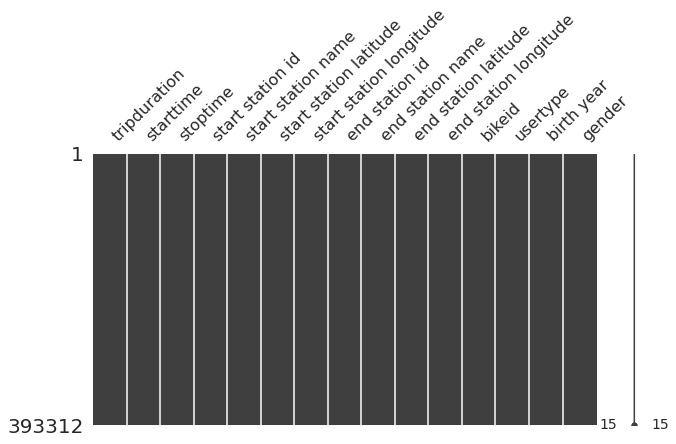

In [ ]:
#check for missing values
msno.matrix(citibike_df, figsize = (10,5))

In [ ]:
citibike_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,393312.000000,393312.000000,393312.000000,393312.000000,393312.000000,393312.000000,393312.000000,393312.000000,393312.000000,393312.000000
mean,25.679634,3303.982978,40.722248,-74.046799,3302.651834,40.721795,-74.046016,40770.038377,1980.087943,0.984839
std,290.458594,184.482210,0.007357,0.011905,189.905510,0.092121,0.167393,6153.655110,11.036528,0.681366
min,1.016667,3184.000000,40.709651,-74.083639,82.000000,0.000000,-74.083639,14531.000000,1888.000000,0.000000
25%,5.383333,3195.000000,40.716870,-74.051789,3195.000000,40.716870,-74.050656,42127.000000,1970.000000,1.000000
50%,10.016667,3209.000000,40.721124,-74.043991,3209.000000,40.721124,-74.043845,42380.000000,1982.000000,1.000000
75%,22.750000,3276.000000,40.727224,-74.037683,3276.000000,40.727224,-74.037683,44237.000000,1990.000000,1.000000
max,54362.600000,3792.000000,40.748716,-74.032108,4282.000000,40.848282,0.000000,55298.000000,2004.000000,2.000000


## Visualization

<Figure size 3600x2400 with 0 Axes>

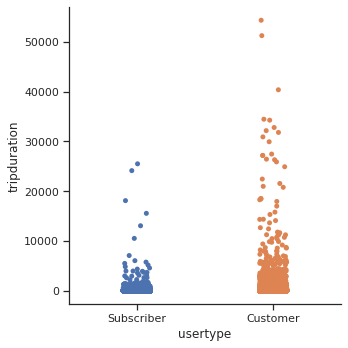

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=300)
sns.catplot(data = citibike_df, x = 'usertype', y = 'tripduration', jitter = True)
plt.show()

In [ ]:
citibike_df = citibike_df.rename(columns = {'starttime' : 'datetime'})
citibike_df['datetime'] = pd.to_datetime(citibike_df['datetime'])
citibike_df['month'] = citibike_df['datetime'].dt.month
citibike_df['day'] = citibike_df['datetime'].dt.day
citibike_df['year'] = citibike_df['datetime'].dt.year
citibike_df['hour'] = citibike_df['datetime'].dt.hour
citibike_df

,tripduration,datetime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month,day,year,hour
0,3.766667,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,1,1,2020,0
1,6.283333,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,1,1,2020,0
2,4.800000,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1,1,1,2020,0
3,7.250000,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0,1,1,2020,0
4,3.850000,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2,1,1,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393307,28.333333,2021-04-30 23:55:22.990,2021-05-01 00:23:43.666,3202,Newport PATH,40.727224,-74.033759,3184,Paulus Hook,40.714145,-74.033552,39772,Customer,1970,0,4,30,2021,23
393308,32.633333,2021-04-30 23:55:50.683,2021-05-01 00:28:28.700,3677,Glenwood Ave,40.727551,-74.071061,3193,Lincoln Park,40.724605,-74.078406,32575,Customer,1970,0,4,30,2021,23
393309,14.616667,2021-04-30 23:57:33.152,2021-05-01 00:12:11.093,3272,Jersey & 3rd,40.723332,-74.045953,3202,Newport PATH,40.727224,-74.033759,42495,Customer,1970,0,4,30,2021,23
393310,2.883333,2021-04-30 23:59:38.463,2021-05-01 00:02:31.816,3276,Marin Light Rail,40.714584,-74.042817,3276,Marin Light Rail,40.714584,-74.042817,42470,Customer,1970,0,4,30,2021,23


In [ ]:
rentals_per_hour = pd.value_counts(citibike_df['hour'])
rph_df = rentals_per_hour.to_frame()
rph_df.reset_index(inplace=True)
rph_df.rename(columns = {'index' : 'Time of Day', 'hour' : 'Rides'},inplace=True)

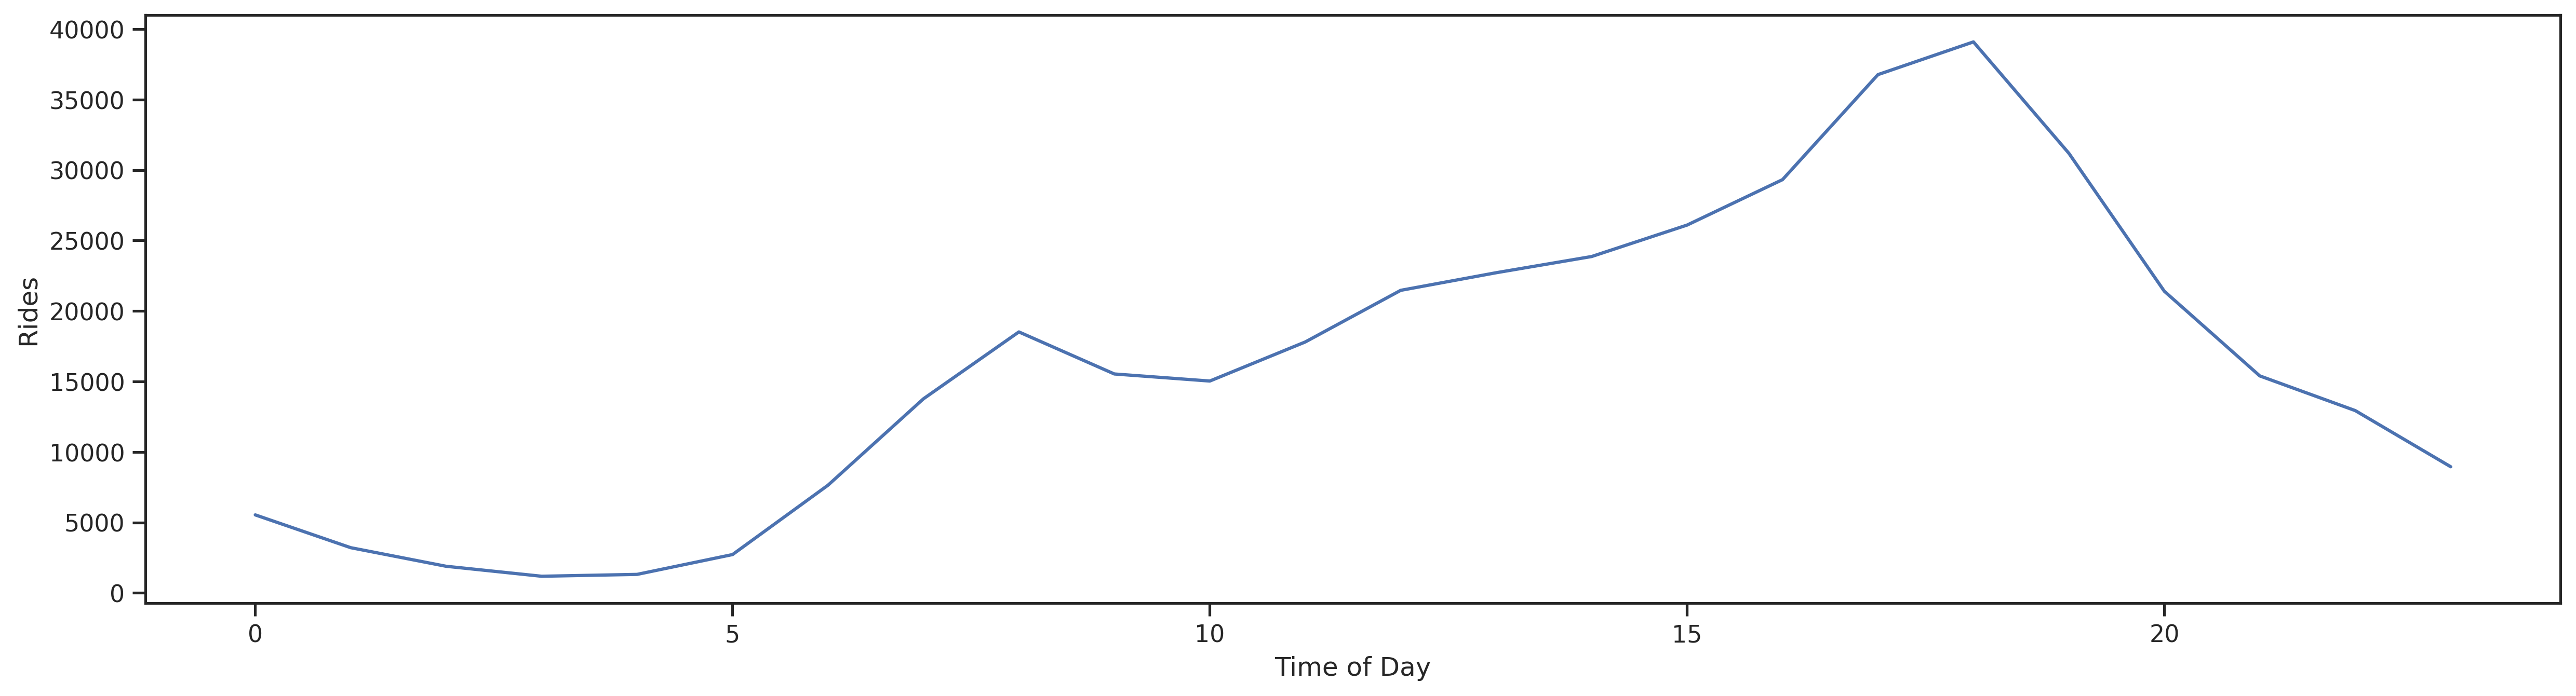

In [ ]:
plt.figure(figsize=(20,5), dpi = 300)
sns.lineplot(x = "Time of Day", y = "Rides",data=rph_df)

In [ ]:
citibike_df.to_csv('Citibike_DF.csv')

### Citi Bike Most Popular Routes

In [ ]:
tmp = citibike_df.groupby(['start station latitude', 'end station latitude', 'start station name', 'start station longitude', 'end station longitude', 'end station name']).size().nlargest(10).to_frame('size').reset_index()
latstart = tmp['start station latitude']
longstart = tmp['start station longitude']
namestart = tmp['start station name']
latsend = tmp['end station latitude']
longsend = tmp['end station longitude']
nameend = tmp['end station name']
size = tmp['size']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',\
          'lightred', 'pink', 'darkblue', 'darkgreen', 'beige',\
          'darkpurple', 'cadetblue', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
placestart = [[x[0],x[1]] for x in zip(latstart, longstart)]
placesend = [[x[0],x[1]] for x in zip(latsend, longsend)]
places = list(zip(placestart, placesend))

m = folium.Map(places[0][0], tiles='OpenStreetMap', zoom_start=12)
m.get_root().html.add_child(folium.Element('<h3 align="center" style="font-size:16px"><b>January</b></h3>'))
for i, pair in enumerate(places):
    marker_cluster = plugins.MarkerCluster().add_to(m)
    folium.Marker(pair[0], icon=folium.Icon(color=colors[i]), popup=f"Start {namestart[i]}\nUsage in a month:\n{size[i]}").add_to(marker_cluster)
    folium.Marker(pair[1], icon=folium.Icon(color=colors[i]), popup=f"End {nameend[i]}\nUsage in a month:\n{size[i]}").add_to(marker_cluster)
    folium.PolyLine(pair, color=colors[i]).add_to(m)
m